Pivot_table 

pandas.pivot_table(values=None, index=None, columns=None, aggfunc='mean')

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df_original = dataset['train'].to_pandas()

# Objects to Datetime
df_original['job_posted_date'] = pd.to_datetime(df_original['job_posted_date'])
df_original['job_posted_month'] = df_original['job_posted_date'].dt.month

In [19]:
df_altered = df_original

In [20]:
top_countries = df_altered['job_country'].value_counts().head(6).index
top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

In [21]:
df_altered['salary_year_avg'].min()

15000.0

Pivot table

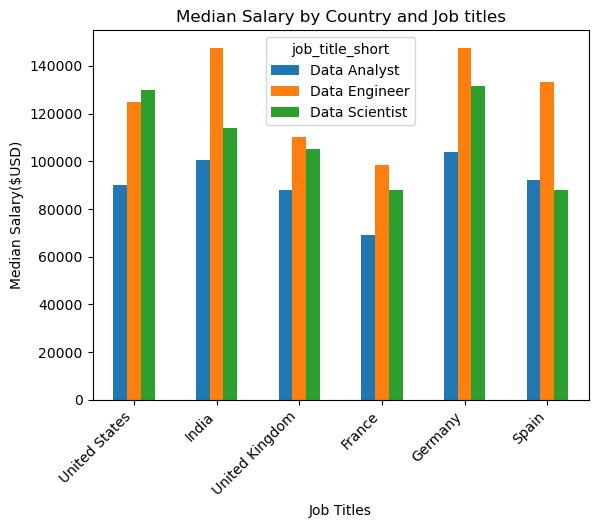

In [23]:
df_job_country_salary = df_altered.pivot_table(values='salary_year_avg',
                                                index='job_country',
                                                  columns='job_title_short',
                                                    aggfunc='median')

df_job_country_salary = df_job_country_salary.loc[top_countries]
df_job_country_salary = df_job_country_salary[['Data Analyst', 'Data Engineer', 'Data Scientist']]

df_job_country_salary.plot(kind='bar')
plt.title("Median Salary by Country and Job titles")
plt.xlabel('Job Titles')
plt.ylabel('Median Salary($USD)')
plt.xticks(rotation=45, ha='right')
plt.show()